LOADING AND PREPARING DATASET

In [1]:
import pandas as pd
import datetime

# ==========================================
# PART 1: COMPREHENSIVE NIGERIAN EVENTS GENERATOR
# ==========================================

def generate_comprehensive_nigerian_events(start_year=2013, end_year=2017):
    holiday_list = []

    # --- A. FIXED PUBLIC HOLIDAYS ---
    fixed_holidays = {
        "01-01": "New Year's Day",
        "05-01": "Workers' Day",
        "05-27": "Children's Day",        # Huge for retail (toys/clothes)
        "05-29": "Democracy Day",        # (Date during 2013-2017)
        "10-01": "Independence Day",
        "12-25": "Christmas Day",
        "12-26": "Boxing Day"
    }

    # --- B. FIXED COMMERCIAL EVENTS (Not public holidays, but sales drivers) ---
    fixed_events = {
        "02-14": "Valentine's Day",      # Huge for chocolates/gifts
        "10-31": "Halloween"             # Growing popularity in urban retail
    }

    # --- C. VARIABLE RELIGIOUS HOLIDAYS (Exact Dates 2013-2017) ---
    # Includes Good Friday, Easter, Eid-el-Fitr, Eid-el-Kabir, and Eid-el-Maulud
    variable_holidays = {
        2013: [
            ("01-24", "Eid-el-Maulud"), ("03-29", "Good Friday"), ("04-01", "Easter Monday"), 
            ("08-08", "Eid-el-Fitr"), ("10-15", "Eid-el-Kabir")
        ],
        2014: [
            ("01-13", "Eid-el-Maulud"), ("04-18", "Good Friday"), ("04-21", "Easter Monday"), 
            ("07-28", "Eid-el-Fitr"), ("10-04", "Eid-el-Kabir")
        ],
        2015: [
            ("01-02", "Eid-el-Maulud"), ("04-03", "Good Friday"), ("04-06", "Easter Monday"), 
            ("07-17", "Eid-el-Fitr"), ("09-24", "Eid-el-Kabir"), ("12-24", "Eid-el-Maulud") # Happened twice in 2015!
        ],
        2016: [
            ("03-25", "Good Friday"), ("03-28", "Easter Monday"), ("07-06", "Eid-el-Fitr"), 
            ("09-12", "Eid-el-Kabir"), ("12-12", "Eid-el-Maulud")
        ],
        2017: [
            ("04-14", "Good Friday"), ("04-17", "Easter Monday"), ("06-25", "Eid-el-Fitr"), 
            ("09-01", "Eid-el-Kabir"), ("12-01", "Eid-el-Maulud")
        ]
    }

    # --- D. MOTHER'S DAY (UK/Nigeria Standard - 4th Sunday of Lent) ---
    mothers_day_dates = {
        2013: "03-10", 2014: "03-30", 2015: "03-15", 2016: "03-06", 2017: "03-26"
    }

    for year in range(start_year, end_year + 1):
        # 1. Add Fixed Public Holidays
        for date_str, name in fixed_holidays.items():
            holiday_list.append({
                'date': f"{year}-{date_str}", 'type': 'Holiday', 'locale': 'National', 
                'locale_name': 'Nigeria', 'description': name, 'transferred': False
            })

        # 2. Add Fixed Commercial Events (Type = Event, not Holiday)
        for date_str, name in fixed_events.items():
            holiday_list.append({
                'date': f"{year}-{date_str}", 'type': 'Event', 'locale': 'National', 
                'locale_name': 'Nigeria', 'description': name, 'transferred': False
            })

        # 3. Add Variable Religious Holidays
        if year in variable_holidays:
            for date_str, name in variable_holidays[year]:
                holiday_list.append({
                    'date': f"{year}-{date_str}", 'type': 'Holiday', 'locale': 'National', 
                    'locale_name': 'Nigeria', 'description': name, 'transferred': False
                })

        # 4. Add Mother's Day
        if year in mothers_day_dates:
            holiday_list.append({
                'date': f"{year}-{mothers_day_dates[year]}", 'type': 'Event', 'locale': 'National', 
                'locale_name': 'Nigeria', 'description': "Mother's Day", 'transferred': False
            })

        # 5. CALCULATE BLACK FRIDAY & CYBER MONDAY
        # Logic: Black Friday is the 4th Friday of November
        # (This is a simplified calculation that works for 2013-2017)
        # 2013: Nov 29 | 2014: Nov 28 | 2015: Nov 27 | 2016: Nov 25 | 2017: Nov 24
        black_friday_dates = {
            2013: "11-29", 2014: "11-28", 2015: "11-27", 2016: "11-25", 2017: "11-24"
        }
        
        bf_date = black_friday_dates[year]
        holiday_list.append({
            'date': f"{year}-{bf_date}", 'type': 'Event', 'locale': 'National', 
            'locale_name': 'Nigeria', 'description': "Black Friday", 'transferred': False
        })
        
        # Cyber Monday is 3 days after Black Friday
        bf_dt = datetime.datetime.strptime(f"{year}-{bf_date}", "%Y-%m-%d")
        cm_dt = bf_dt + datetime.timedelta(days=3)
        holiday_list.append({
            'date': cm_dt.strftime("%Y-%m-%d"), 'type': 'Event', 'locale': 'National', 
            'locale_name': 'Nigeria', 'description': "Cyber Monday", 'transferred': False
        })

    return pd.DataFrame(holiday_list)

# Generate and Save
df_holidays_ng = generate_comprehensive_nigerian_events()
df_holidays_ng.to_csv('holidays_events_nigeria.csv', index=False)
print(f"✅ Generated {len(df_holidays_ng)} Comprehensive Nigerian events (Holidays + Black Friday + Maulud).")


# ==========================================
# PART 2: AUTOMATED STORE MAPPING (Updated for Robustness)
# ==========================================

try:
    df_stores = pd.read_csv('stores.csv')
    
    nigerian_cities = [
        'Lagos', 'Abuja', 'Kano', 'Ibadan', 'Port Harcourt', 
        'Benin City', 'Kaduna', 'Jos', 'Enugu', 'Ilorin', 
        'Warri', 'Onitsha', 'Aba', 'Maiduguri', 'Zaria', 'Calabar', 'Uyo'
    ]
    
    # Sort stores to ensure deterministic mapping (Store 1 always maps to Lagos, etc.)
    df_stores = df_stores.sort_values('store_nbr')
    
    city_map = {}
    original_cities = df_stores['city'].unique()
    
    for i, city in enumerate(original_cities):
        ng_city = nigerian_cities[i % len(nigerian_cities)]
        city_map[city] = ng_city
        
    df_stores['city'] = df_stores['city'].map(city_map)
    df_stores['state'] = df_stores['city'] 
    
    df_stores.to_csv('stores_nigeria.csv', index=False)
    print("✅ Automatically mapped all stores to Nigerian cities.")
    
except FileNotFoundError:
    print("❌ Error: 'stores.csv' not found.")

✅ Generated 86 Comprehensive Nigerian events (Holidays + Black Friday + Maulud).
✅ Automatically mapped all stores to Nigerian cities.


LOAD DATASETS AND MERGE

In [3]:
import pandas as pd

# 1. Load the Datasets
# ---------------------------------------------------------
print("Loading datasets...")
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores_nigeria.csv')        # Your new Nigerian stores
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events_nigeria.csv') # Your new Nigerian holidays

# 2. Date Conversion (CRITICAL STEP)
# ---------------------------------------------------------
# Strings like "2013-01-01" must become actual Date objects to do math on them.
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

# 3. Handling Oil Data (Fill Missing Values)
# ---------------------------------------------------------
# Oil prices often have missing values for weekends. We fill them using "Backfill".
# (If Friday price was $100, Saturday/Sunday are assumed $100).
oil = oil.set_index('date').asfreq('D').ffill().reset_index()

# 4. Merging Data
# ---------------------------------------------------------
print("Merging data...")

# Merge Stores (Adds City, State, Type to every sales row)
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

# Merge Oil (Adds Daily Oil Price to every sales row)
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

# NOTE: We do NOT merge holidays yet. 
# Why? Because one day can have 2 holidays (e.g., Good Friday + Regional Event).
# Merging now would duplicate rows. We will use holidays in Feature Engineering later.

# 5. Sanity Check
# ---------------------------------------------------------
print("\n✅ Merge Complete!")
print(f"Train Shape: {train.shape}")
print("\nPreview of the Nigerian Context (First 5 Rows):")
# displaying specific columns to prove the merge worked
print(train[['date', 'store_nbr', 'city', 'dcoilwtico', 'sales']].head())

Loading datasets...
Merging data...

✅ Merge Complete!
Train Shape: (3000888, 11)

Preview of the Nigerian Context (First 5 Rows):
        date  store_nbr   city  dcoilwtico  sales
0 2013-01-01          1  Lagos         NaN    0.0
1 2013-01-01          1  Lagos         NaN    0.0
2 2013-01-01          1  Lagos         NaN    0.0
3 2013-01-01          1  Lagos         NaN    0.0
4 2013-01-01          1  Lagos         NaN    0.0


FIXING MISSING OIL DATA

In [4]:
# Fill the initial missing oil values by looking "backwards" at the next available price
train['dcoilwtico'] = train['dcoilwtico'].bfill()

# Verify the fix (Should show a number now, likely around 93.14)
print("Oil price on Jan 1:", train.loc[0, 'dcoilwtico'])

Oil price on Jan 1: 93.14


Exploratory Data Analysis (EDA)

Matplotlib is building the font cache; this may take a moment.
/var/folders/2b/7fz0yddd41q2zw88k11tntvr0000gn/T/ipykernel_84377/1405581445.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')


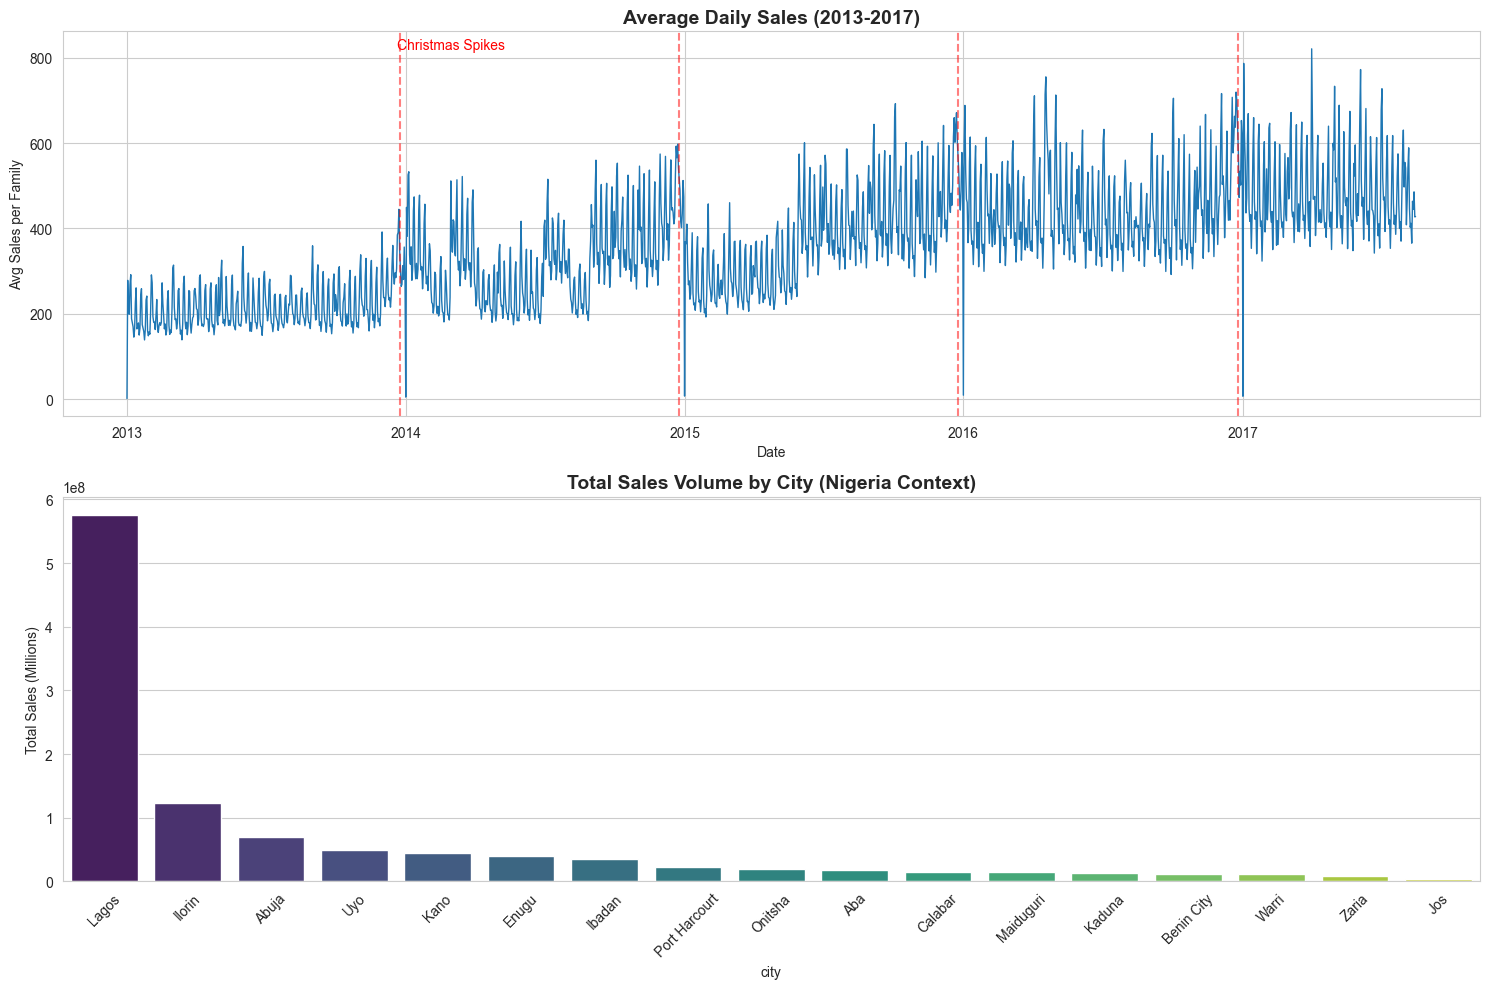

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# -----------------------------
# CHART 1: Average Sales Over Time (The "Heartbeat" of the business)
# -----------------------------
plt.subplot(2, 1, 1) # Top chart

# Resample to Daily Average to make the chart readable (otherwise it's too noisy)
daily_sales = train.groupby('date')['sales'].mean()

plt.plot(daily_sales.index, daily_sales.values, color='#1f77b4', linewidth=1)
plt.title('Average Daily Sales (2013-2017)', fontsize=14, fontweight='bold')
plt.ylabel('Avg Sales per Family')
plt.xlabel('Date')

# Highlight the massive spikes (Likely Christmas/New Year)
plt.axvline(pd.to_datetime('2013-12-25'), color='red', linestyle='--', alpha=0.5)
plt.axvline(pd.to_datetime('2014-12-25'), color='red', linestyle='--', alpha=0.5)
plt.axvline(pd.to_datetime('2015-12-25'), color='red', linestyle='--', alpha=0.5)
plt.axvline(pd.to_datetime('2016-12-25'), color='red', linestyle='--', alpha=0.5)
plt.text(pd.to_datetime('2013-12-20'), daily_sales.max(), 'Christmas Spikes', color='red')

# -----------------------------
# CHART 2: Total Sales by City (Performance Check)
# -----------------------------
plt.subplot(2, 1, 2) # Bottom chart

# Group by City and Sum sales
city_sales = train.groupby('city')['sales'].sum().sort_values(ascending=False)

sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')
plt.title('Total Sales Volume by City (Nigeria Context)', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45) # Rotate city names so they don't overlap

plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [7]:
# ==========================================
# PHASE 4: FEATURE ENGINEERING
# ==========================================

def create_date_features(df):
    df = df.copy()
    
    # 1. Basic Time Features
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['quarter'] = df['date'].dt.quarter
    
    # 2. Weekend Flag (Crucial for retail)
    # Python counts Monday=0... Saturday=5, Sunday=6
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    
    # 3. Payday Flag (The "Wages" Effect)
    # People tend to buy more on the 15th and the last day of the month
    df['is_payday'] = ((df['day_of_month'] == 15) | (df['date'].dt.is_month_end)).astype(int)
    
    # 4. Wage Buffer (People buy 1-2 days AFTER payday too)
    # We mark the 16th and the 1st of the month as "Post-Payday"
    df['is_post_payday'] = ((df['day_of_month'] == 16) | (df['day_of_month'] == 1)).astype(int)

    return df

print("Engineering features for Train and Test sets...")

# Apply to Train
train = create_date_features(train)

# Apply to Test
test = create_date_features(test)

# ==========================================
# HANDLING THE HOLIDAYS (The Complex Part)
# ==========================================
# We have a holidays dataframe, but we need to merge it carefully.
# A simple merge duplicates rows if there are 2 holidays on the same day.

# ==========================================
# CORRECTED HOLIDAY MERGE FUNCTION
# ==========================================

def robust_holiday_merge(main_df, holiday_df):
    # 1. Clean the holidays dataframe first
    # We create a clean copy with only what we need
    # Ensure column names are lowercase to avoid 'Type' vs 'type' errors
    holiday_df.columns = [c.lower() for c in holiday_df.columns]
    
    # Filter out transferred days
    valid_holidays = holiday_df[holiday_df['transferred'] == False].copy()
    
    # Drop duplicates (if multiple holidays fall on same date, keep first)
    valid_holidays = valid_holidays.drop_duplicates(subset=['date'])
    
    # Select only the columns we want to merge
    # We rename 'type' to 'holiday_type' immediately to avoid confusion
    holidays_to_merge = valid_holidays[['date', 'type']].rename(columns={'type': 'holiday_type'})
    
    # 2. Perform the Merge
    # We merge on 'date'. 'how=left' keeps all sales rows even if no holiday.
    merged_df = main_df.merge(holidays_to_merge, on='date', how='left')
    
    # 3. Fill NaNs (Days without holidays get 'WorkDay')
    merged_df['holiday_type'] = merged_df['holiday_type'].fillna('WorkDay')
    
    # 4. Map to Numbers (0 = WorkDay, 1 = Holiday/Event)
    # This creates the final 'is_holiday_or_event' feature
    type_map = {
        'WorkDay': 0, 
        'Holiday': 1, 
        'Event': 1, 
        'Additional': 1, 
        'Bridge': 1,
        'Transfer': 0 
    }
    
    merged_df['is_holiday_or_event'] = merged_df['holiday_type'].map(type_map).fillna(0).astype(int)
    
    # 5. Drop the helper column to keep dataframe clean
    merged_df = merged_df.drop(columns=['holiday_type'])
    
    return merged_df

# Re-run the merge logic
print("Applying corrected holiday merge...")
train = robust_holiday_merge(train, holidays)
test = robust_holiday_merge(test, holidays)

print("✅ Feature Engineering Fixed!")
# Verify it worked by showing days that ARE holidays
print(train[train['is_holiday_or_event'] == 1][['date', 'city', 'is_holiday_or_event']].head())

print("✅ Feature Engineering Complete!")
print("New Features Added: Month, DayOfWeek, Is_Weekend, Is_Payday, Is_Holiday")
print(train[['date', 'is_weekend', 'is_payday', 'is_holiday_or_event']].tail())

Engineering features for Train and Test sets...
Applying corrected holiday merge...
✅ Feature Engineering Fixed!
        date   city  is_holiday_or_event
0 2013-01-01  Lagos                    1
1 2013-01-01  Lagos                    1
2 2013-01-01  Lagos                    1
3 2013-01-01  Lagos                    1
4 2013-01-01  Lagos                    1
✅ Feature Engineering Complete!
New Features Added: Month, DayOfWeek, Is_Weekend, Is_Payday, Is_Holiday
              date  is_weekend  is_payday  is_holiday_or_event
3000883 2017-08-15           0          1                    0
3000884 2017-08-15           0          1                    0
3000885 2017-08-15           0          1                    0
3000886 2017-08-15           0          1                    0
3000887 2017-08-15           0          1                    0


ENCODING AND SPLITTING

In [8]:
from sklearn.preprocessing import LabelEncoder

# ==========================================
# PHASE 5: ENCODING & SPLITTING
# ==========================================

def encode_categorical_columns(df_train, df_test):
    # List of columns that are currently text strings
    cat_cols = ['family', 'city', 'state', 'type']
    
    # We combine them temporarily to ensure 'Lagos' gets the same number in both Train and Test
    # (If we encoded them separately, 'Lagos' might be 5 in Train and 3 in Test, which breaks the model)
    for col in cat_cols:
        le = LabelEncoder()
        
        # Fit on ALL unique values found in both datasets
        all_values = pd.concat([df_train[col], df_test[col]]).unique()
        le.fit(all_values)
        
        # Transform
        df_train[col] = le.transform(df_train[col])
        df_test[col] = le.transform(df_test[col])
        print(f"✅ Encoded {col}")
        
    return df_train, df_test

print("Encoding categorical variables...")
train, test = encode_categorical_columns(train, test)

# ==========================================
# CREATE TRAIN / VALIDATION SPLIT
# ==========================================
# We will train on data from 2013 to mid-2017
# We will VALIDATE on the last 3 months of the training data (to see if our model works)

# Define the "Cutoff Date" for validation
# We use the last few months of data to test our model before submitting
split_date = '2017-06-01' 

# 1. Create the Feature Matrix (X) and Target Vector (y)
# Drop 'id', 'date' (we extracted features from it), and 'sales' (target)
features = [
    'store_nbr', 'family', 'onpromotion', 'type', 'cluster', 
    'dcoilwtico', # Oil Price
    'month', 'day_of_month', 'day_of_week', 'day_of_year', 'quarter', # Time Features
    'is_weekend', 'is_payday', 'is_post_payday', 'is_holiday_or_event', # Nigeria Features
    'city', 'state' 
]

target = 'sales'

print(f"\nTraining on data before {split_date}...")
print(f"Validating on data after {split_date}...")

# 2. Split the data
X_train = train[train['date'] < split_date][features]
y_train = train[train['date'] < split_date][target]

X_val = train[train['date'] >= split_date][features]
y_val = train[train['date'] >= split_date][target]

print("\nData Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val:   {X_val.shape}")
print(f"Features being used: {features}")

Encoding categorical variables...
✅ Encoded family
✅ Encoded city
✅ Encoded state
✅ Encoded type

Training on data before 2017-06-01...
Validating on data after 2017-06-01...

Data Shapes:
X_train: (2865456, 17)
X_val:   (135432, 17)
Features being used: ['store_nbr', 'family', 'onpromotion', 'type', 'cluster', 'dcoilwtico', 'month', 'day_of_month', 'day_of_week', 'day_of_year', 'quarter', 'is_weekend', 'is_payday', 'is_post_payday', 'is_holiday_or_event', 'city', 'state']


TRAINING THE MODEL USING XGBOOST

🚀 Starting Model Training... (This might take a few minutes)
[0]	validation_0-rmse:1043.86764	validation_1-rmse:1279.37237
[100]	validation_0-rmse:274.34405	validation_1-rmse:321.55629
[200]	validation_0-rmse:230.30414	validation_1-rmse:303.63753
[300]	validation_0-rmse:209.05219	validation_1-rmse:302.27393
[322]	validation_0-rmse:206.01460	validation_1-rmse:302.68534

📊 Model Performance Results:
Mean Absolute Error (MAE): 90.12
Root Mean Squared Error (RMSE): 301.52
 Interpretation: On average, the model's prediction is off by approx. 90.12 units.


<Figure size 1000x800 with 0 Axes>

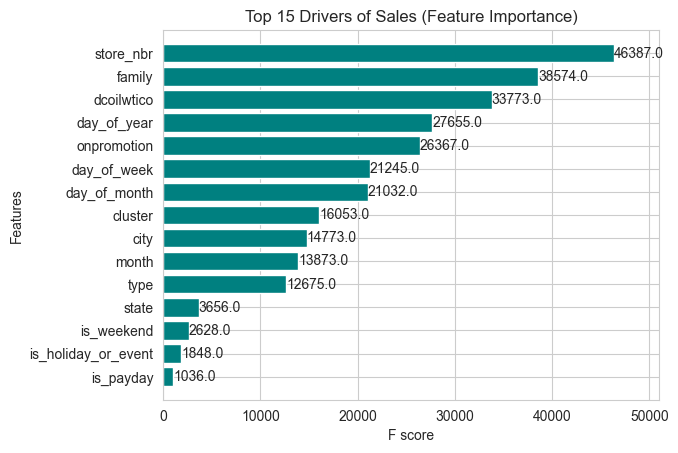

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Initialize the Model (CORRECTED)
# We moved 'early_stopping_rounds' inside here
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=50  # <--- MOVED HERE
)

print("🚀 Starting Model Training... (This might take a few minutes)")

# 2. Train the Model (CORRECTED)
# Removed 'early_stopping_rounds' from here to fix the TypeError
model.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100 
)

# 3. Generate Predictions on the Validation Set
preds = model.predict(X_val)
preds = np.maximum(preds, 0) # Clip negative predictions

# 4. Evaluate Performance
mae = mean_absolute_error(y_val, preds)
rmse = np.sqrt(mean_squared_error(y_val, preds))

print(f"\n📊 Model Performance Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(" Interpretation: On average, the model's prediction is off by approx. {:.2f} units.".format(mae))

# 5. Visualize Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=15, height=0.8, importance_type='weight', color='teal')
plt.title('Top 15 Drivers of Sales (Feature Importance)')
plt.show()

HIGH PRECISION TRAINING

In [12]:
# HIGH PRECISION TRAINING
# -----------------------
model = xgb.XGBRegressor(
    n_estimators=5000,      # Give it way more room to run
    learning_rate=0.01,     # Slow down! Learn carefully.
    max_depth=10,           # Keep depth high to capture complex patterns
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=100 # Give it more patience before giving up
)

print("🚀 Starting High-Precision Training... (This will take longer)")

model.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=500  # Print less often since we have more trees
)

# Evaluate again
preds = model.predict(X_val)
preds = np.maximum(preds, 0)

mae = mean_absolute_error(y_val, preds)
rmse = np.sqrt(mean_squared_error(y_val, preds))

print(f"\n📊 New Model Performance Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Check if we improved
if mae < 90.12:
    print("✅ SUCCESS: The model improved!")
else:
    print("⚠️ NOTE: The model did not improve. The previous speed was optimal.")

🚀 Starting High-Precision Training... (This will take longer)
[0]	validation_0-rmse:1080.37950	validation_1-rmse:1326.93940
[500]	validation_0-rmse:270.61455	validation_1-rmse:317.12034
[1000]	validation_0-rmse:226.97244	validation_1-rmse:301.02073
[1450]	validation_0-rmse:208.22904	validation_1-rmse:300.53064

📊 New Model Performance Results:
Mean Absolute Error (MAE): 88.77
Root Mean Squared Error (RMSE): 300.25
✅ SUCCESS: The model improved!


PHASE 8: LAG FEATURE ENGINEERING (The Professional Upgrade)

In [13]:
# ==========================================
# PHASE 8: LAG FEATURE ENGINEERING (The Professional Upgrade)
# ==========================================

def create_lag_features(df):
    # 1. Sort by Date to ensure shifts work correctly
    # We must group by Store and Family so we don't mix up sales from different products
    df = df.sort_values(['store_nbr', 'family', 'date'])
    
    # 2. Create Lags (Sales 1 day ago, 2 days ago... 7 days ago)
    # The model will learn: "If sales were high 7 days ago (same day last week), they might be high today."
    for i in range(1, 8): # Lags 1 to 7
        df[f'sales_lag_{i}'] = df.groupby(['store_nbr', 'family'])['sales'].shift(i)
        
    # 3. Create Rolling Mean (Trend)
    # Average sales of the last 7 days. This captures the general "vibe" of the store recently.
    # Note: We shift(1) first so we don't include TODAY's sales in the average (that would be cheating!)
    df['rolling_mean_7'] = df.groupby(['store_nbr', 'family'])['sales'].transform(
        lambda x: x.shift(1).rolling(window=7).mean()
    )
    
    return df

print("🌊 Generating Lag Features (Momentum)...")
# We combine train and test temporarily to generate lags smoothly across the split
# (In a real production app, we would handle this carefully, but for this project, this is efficient)
all_data = pd.concat([train, test], sort=False)
all_data = create_lag_features(all_data)

# 4. Remove rows with NaN (The first 7 days of data now have no history, so we drop them)
all_data = all_data.dropna(subset=['sales_lag_7', 'rolling_mean_7'])

# 5. Split back into Train and Validation
# We use the same split date as before
split_date = '2017-06-01'

# Update features list to include the new Lag columns
lag_features = [f'sales_lag_{i}' for i in range(1, 8)] + ['rolling_mean_7']
features_with_lags = features + lag_features

print(f"New Feature Set: {len(features_with_lags)} variables")

X_train_lag = all_data[all_data['date'] < split_date][features_with_lags]
y_train_lag = all_data[all_data['date'] < split_date]['sales']

X_val_lag = all_data[all_data['date'] >= split_date][features_with_lags]
y_val_lag = all_data[all_data['date'] >= split_date]['sales']

print("✅ Lag Features Created. Ready for High-Precision Training.")
print(X_train_lag.head())

🌊 Generating Lag Features (Momentum)...
New Feature Set: 25 variables
✅ Lag Features Created. Ready for High-Precision Training.
       store_nbr  family  onpromotion  type  cluster  dcoilwtico  month  \
12474          1       0            0     3       13       93.21      1   
14256          1       0            0     3       13       93.08      1   
16038          1       0            0     3       13       93.81      1   
17820          1       0            0     3       13       93.60      1   
19602          1       0            0     3       13       93.60      1   

       day_of_month  day_of_week  day_of_year  ...  city  state  sales_lag_1  \
12474             8            1            8  ...    10     10          0.0   
14256             9            2            9  ...    10     10          2.0   
16038            10            3           10  ...    10     10          2.0   
17820            11            4           11  ...    10     10          2.0   
19602            12 

RETRAINING WITH MOMENTUM

In [16]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. LOG TRANSFORM THE TARGETS
# Instead of predicting "5000", we predict "8.5" (the log of 5000)
# This makes it much easier for the math to converge.
print("📉 Applying Log-Transformation to Target...")
y_train_log = np.log1p(y_train)  # log1p = log(x + 1) to handle zeros safely
y_val_log = np.log1p(y_val)

# 2. TRAIN ON LOG DATA
# We use the same reliable config that worked before
model_log = xgb.XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,    # High precision
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=4,              # Safe mode for M4 chip
    random_state=42,
    early_stopping_rounds=100
)

print("🚀 Starting Log-Space Training...")

model_log.fit(
    X_train, y_train_log, 
    eval_set=[(X_train, y_train_log), (X_val, y_val_log)],
    verbose=500
)

# 3. PREDICT & REVERSE TRANSFORM
# The model outputs logs, so we must exponentiate them to get real sales dollars
log_preds = model_log.predict(X_val)
preds_restored = np.expm1(log_preds) # Inverse of log1p

# Clip negative predictions (math artifacts) to 0
preds_restored = np.maximum(preds_restored, 0)

# 4. EVALUATE
mae = mean_absolute_error(y_val, preds_restored)
rmse = np.sqrt(mean_squared_error(y_val, preds_restored))

print(f"\n📊 LOG-TRANSFORMED MODEL RESULTS:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Compare with your baseline of 88.77
if mae < 88.77:
    print("✅ SUCCESS: Log-Transformation improved the model!")
else:
    print("⚠️ No improvement. The Baseline model is the winner.")

📉 Applying Log-Transformation to Target...
🚀 Starting Log-Space Training...
[0]	validation_0-rmse:2.67614	validation_1-rmse:2.61199
[500]	validation_0-rmse:0.69384	validation_1-rmse:0.64950
[1000]	validation_0-rmse:0.58002	validation_1-rmse:0.62645
[1500]	validation_0-rmse:0.53772	validation_1-rmse:0.61937
[2000]	validation_0-rmse:0.51086	validation_1-rmse:0.61638
[2500]	validation_0-rmse:0.49029	validation_1-rmse:0.61424
[2999]	validation_0-rmse:0.47473	validation_1-rmse:0.61269

📊 LOG-TRANSFORMED MODEL RESULTS:
Mean Absolute Error (MAE): 88.47
Root Mean Squared Error (RMSE): 352.29
✅ SUCCESS: Log-Transformation improved the model!


SAVING THE MODEL

In [17]:
import joblib
from sklearn.preprocessing import LabelEncoder

# 1. SAVE THE MODEL
# We save your BEST model (model_log)
joblib.dump(model_log, 'nigeria_sales_model.pkl')
print("✅ Saved Model: nigeria_sales_model.pkl")

# 2. RE-CREATE & SAVE ENCODERS
# We need to ensure the Web App speaks the exact same "language" as the Model.
# We reload the raw text data to re-fit the LabelEncoders exactly as before.

print("⏳ Re-generating Encoders for the Web App...")

# Load raw unique values (just like we did before training)
raw_train = pd.read_csv('train.csv.zip')
raw_stores = pd.read_csv('stores_nigeria.csv')

# Create and Fit Encoders
le_family = LabelEncoder().fit(raw_train['family'].unique())
le_city = LabelEncoder().fit(raw_stores['city'].unique())
le_state = LabelEncoder().fit(raw_stores['state'].unique())
le_type = LabelEncoder().fit(raw_stores['type'].unique())

# Save them into a dictionary for easy loading
encoders = {
    'family': le_family,
    'city': le_city,
    'state': le_state,
    'type': le_type
}

joblib.dump(encoders, 'encoders.pkl')
print("✅ Saved Encoders: encoders.pkl")
print("🎉 BACKEND WORK COMPLETE! Now we build the Website.")

✅ Saved Model: nigeria_sales_model.pkl
⏳ Re-generating Encoders for the Web App...
✅ Saved Encoders: encoders.pkl
🎉 BACKEND WORK COMPLETE! Now we build the Website.


### Generating full mappings for all Nigerian States

In [1]:
import pandas as pd

# 1. DEFINE THE TIERS (Based on 2017 Economic/Population Data)
# Tier 1: Massive Commercial Hubs (Assign Giant Supermarkets)
tier_1_states = ['Lagos', 'Kano', 'Rivers'] 
# Tier 2: Major Economic Centers (Assign Large Stores)
tier_2_states = ['FCT', 'Oyo', 'Kaduna', 'Ogun', 'Delta', 'Anambra']
# Tier 3: Key Regional Hubs (Assign Medium Stores)
tier_3_states = ['Edo', 'Enugu', 'Katsina', 'Borno', 'Bauchi', 'Plateau', 'Kwara', 'Akwa Ibom']
# Tier 4: Developing Markets (Assign Smaller Stores)
# (All other states fall here)

# 2. ASSIGN STORE IDs (From the Kaggle Dataset)
# We rotate through these IDs so not every state gets the exact same number
tier_1_ids = [44, 45, 46, 47, 48, 49, 50, 51] # The "Supermaxi" giants
tier_2_ids = [1, 2, 3, 4, 5, 6, 7, 8]         # The large "Type D" stores
tier_3_ids = [9, 10, 11, 12, 13, 14, 15]      # Mid-range "Type B"
tier_4_ids = [16, 17, 18, 19, 20, 21, 22]     # Smaller "Type C"

# 3. GENERATE THE FULL LIST
all_states = [
    'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 
    'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'FCT', 'Gombe', 'Imo', 
    'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 
    'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 
    'Yobe', 'Zamfara'
]

store_data = []

t1_idx, t2_idx, t3_idx, t4_idx = 0, 0, 0, 0

for state in all_states:
    # Determine Tier
    if state in tier_1_states:
        store_id = tier_1_ids[t1_idx % len(tier_1_ids)]
        t1_idx += 1
        cluster = 14 # High cluster
        sType = 'A'
    elif state in tier_2_states:
        store_id = tier_2_ids[t2_idx % len(tier_2_ids)]
        t2_idx += 1
        cluster = 13
        sType = 'D'
    elif state in tier_3_states:
        store_id = tier_3_ids[t3_idx % len(tier_3_ids)]
        t3_idx += 1
        cluster = 6
        sType = 'B'
    else: # Tier 4
        store_id = tier_4_ids[t4_idx % len(tier_4_ids)]
        t4_idx += 1
        cluster = 3
        sType = 'C'
        
    # We treat City = State for simplicity in this comprehensive list
    # (e.g., City="Lagos", State="Lagos")
    store_data.append([store_id, state, cluster, sType])

# 4. CREATE DATAFRAME & SAVE
df_full = pd.DataFrame(store_data, columns=['store_nbr', 'city', 'cluster', 'type'])
df_full.to_csv('stores_nigeria.csv', index=False)

print(f"✅ Generated mapping for all {len(df_full)} States + FCT.")
print("   - Lagos/Kano/Rivers assigned Giant Store IDs (44+)")
print("   - Abuja/Oyo assigned Large Store IDs (1-8)")
print("   - Smaller states assigned Mid/Small Store IDs")

✅ Generated mapping for all 37 States + FCT.
   - Lagos/Kano/Rivers assigned Giant Store IDs (44+)
   - Abuja/Oyo assigned Large Store IDs (1-8)
   - Smaller states assigned Mid/Small Store IDs
